# Humanoid Model Predictive Control

The following notebook is part of the final project from the course of *<a href="https://scaron.info/robotics-mva/">Robotics</a>* from the master *Mathématiques, Vision et Apprendissage (MVA)* - *ENS Paris Saclay* - France


# Reproduce the formulation and resolution of Model Predictive Control as a QP problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qpsolvers
from pinocchio import SE3
from scripts.humanoid_mpc import MPCParams, feet, foot
from utils.meshcat_viewer_wrapper import MeshcatVisualizer
import time

# reload automatically
%reload_ext autoreload

In [12]:
T = 5 * 1e-3
g = 9.87
h_CoM = 0.08
N = 100

robot_feet = feet(spread=0.4, length=0.2, width=0.5, right=foot(-0.5, 0), left=foot(+0.5, 0))
 

mpc = MPCParams(T, N, h_CoM, g, robot_feet, duration=8)

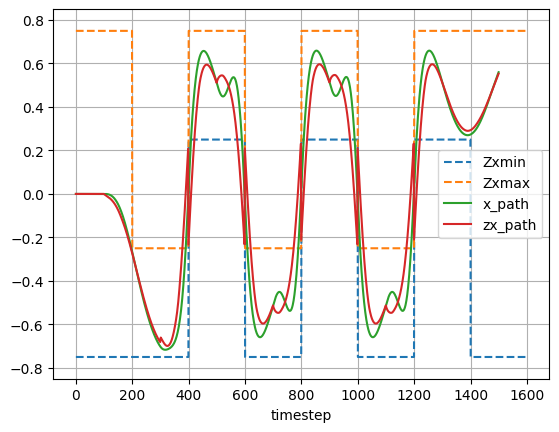

In [13]:
Zxmin, Zxmax = mpc.Zmin[0], mpc.Zmax[0]
x_path, zx_path, jerks = mpc.solve(Zxmin, Zxmax, coord='x')

plt.plot(Zxmin,'--', label= 'Zxmin')
plt.plot(Zxmax,'--', label="Zxmax")
plt.plot(x_path, label="x_path")
plt.plot(zx_path, label="zx_path")
plt.xlabel('timestep')
plt.ylim(min(Zxmin)-0.1, max(Zxmax)+0.1)

plt.legend()
plt.grid()

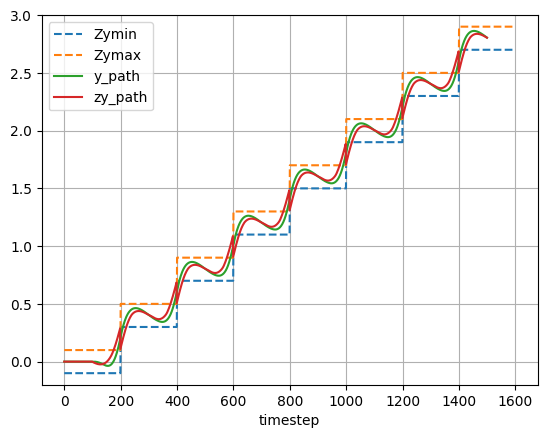

In [14]:
Zymin, Zymax = mpc.Zmin[1], mpc.Zmax[1]
y_path, zy_path, jerks = mpc.solve(Zymin, Zymax, coord="y") 

plt.plot(Zymin,'--', label= 'Zymin')
plt.plot(Zymax,'--', label="Zymax")
plt.plot(y_path, label="y_path")
plt.plot(zy_path, label="zy_path")
plt.xlabel('timestep')
plt.ylim(min(Zymin)-0.1, max(Zymax)+0.1)

plt.legend()
plt.grid()

<span style="color:red"> I dont understand why the paper graphs the x is not that noisy. And at end it should be to a stable x or z position? I believe the peaks on Z are produced for the rapid change of the Zlimits</span>.


## Comparing Different solvers:


In [6]:
# mpc = MPCParams(T, N, h_CoM, g, duration=8)
        
# Zmin, Zmax = mpc.Zmin, mpc.Zmax
# plt.plot(Zmin,'--', label= 'Zmin')
# plt.plot(Zmax,'--', label="Zmax")
# sparse=True
# for solver in qpsolvers.available_solvers[::-1]:
#     print(solver)
#     x_path, z_path, jerks = mpc.solve(Zmin, Zmax, solver) 
#     plt.plot(z_path, label=f"z_path with {solver}")
#     plt.xlabel('timestep')
#     plt.ylim(min(Zmin)-0.1, max(Zmax)+0.1)

#     plt.legend()
#     plt.grid()

print("Other solvers are not working well because the matrix is not sparse.")


Other solvers are not working well because the matrix is not sparse.


## Sphere Visualization

In [11]:
viz = MeshcatVisualizer()
viz.addSphere('CoM', radius=.01, color='red')
viz.addSphere('CoP', radius=.01, color='green')

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7004/static/


In [16]:
for x_CoM, zx_CoP, y_CoM, zy_CoP in zip(x_path, zx_path, y_path, zy_path):
    displacement_x = SE3(np.eye(3), np.array([x_CoM, y_CoM, h_CoM]))
    displacement_z = SE3(np.eye(3), np.array([zx_CoP, zy_CoP, 0]))
    viz.applyConfiguration('CoM', displacement_x)
    viz.applyConfiguration('CoP', displacement_z)
    time.sleep(T)

<span style="color:red"> It would be interesting to add  a movement in the x axis to give the impresion of moving. The problem that is not linear it should be with kind of a curve....</span>.
